<a href="https://colab.research.google.com/github/elisabethpose30/procesamientodigitaldeimagenes/blob/main/TP_imagenesElisabeth_Pose_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicios de Procesamiento Digital de Imágenes**

# **EJERCICIO 1: ESPACIOS DE COLOR**

Usando una imagen a color de su elección:

a) Cargar la imagen con OpenCV y mostrar los canales BGR por separado.
b) Identificar cuál de los tres canales tiene mayor información basándose en los valores promedio.
c) Convertir la imagen de BGR a RGB y explicar por qué los colores se ven diferentes antes y después de la conversión.


# a) Cargar la imagen con OpenCV y mostrar los canales BGR por separado.

IMPORTO LAS LIBRERIAS A UTILIZAR

In [ ]:
import cv2
from cv2 import imread
import random
import numpy as np
import urllib.request
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

*DESCARGO LA IMAGEN QUE VOY A UTILIZAR*

In [ ]:
!wget ""/content/c6ca166b3c9a7f5deb696a710bba5147.jpg""

/content/c6ca166b3c9a7f5deb696a710bba5147.jpg: Scheme missing.


EN EL SIGUIENTE PASO VOY A LEER LA IMAGEN CON OPEN CV, MUESTRO LA INFORMACION DE LA IMAGEN QUE ELEGI Y POSTERIORMENTE MUESTRO MI IMAGEN.

Dimensiones de la imagen: (920, 736, 3)
Tipo de datos: uint8
Tamaño en memoria (bytes): 2031360


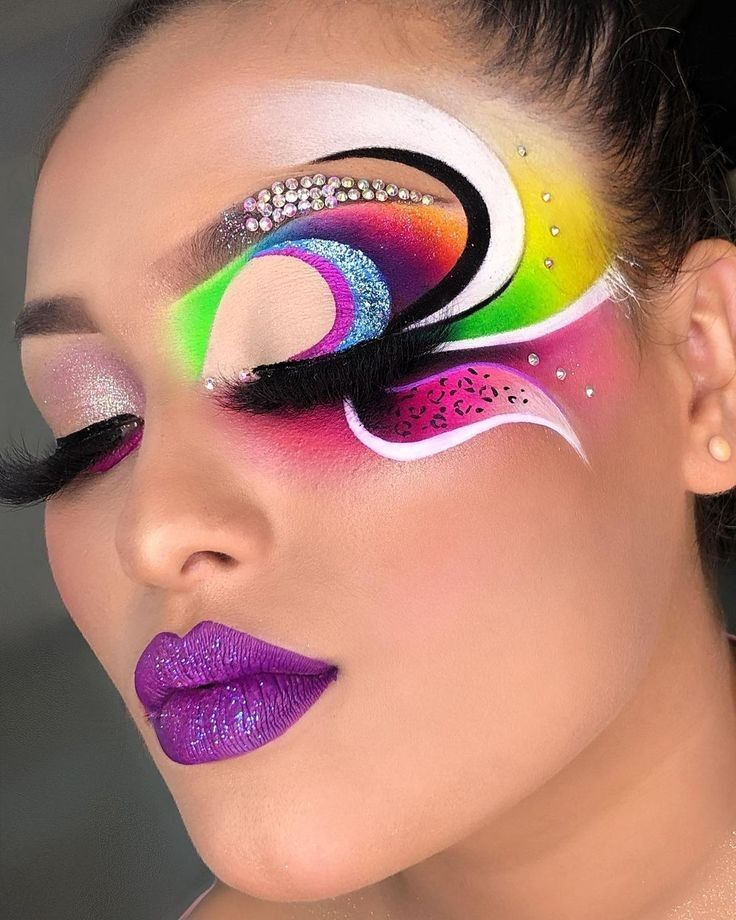

In [ ]:
# Lectura de imagen usando OpenCV
imagen_bgr = cv2.imread('/content/foto1.jpg')

# Información básica de la imagen
print("Dimensiones de la imagen:", imagen_bgr.shape)
print("Tipo de datos:", imagen_bgr.dtype)
print("Tamaño en memoria (bytes):", imagen_bgr.nbytes)

# Visualización de la imagen completa
cv2_imshow(imagen_bgr)

AHORA VAMOS A SEPARAR LOS 3 CANALES : EN BGR EL CANAL 0 ES AZUL EL 1 ES VERDE Y EL 2 ES ROJO.

OPEN CV POR DEFECTO VA A MAPEAR LOS CANALES EN ESCALA DE GRISES.
MAS BLANCO: MAS INTENSIDAD DE ESE COLOR
MAS OSCURO: MENOS INTENSIDAD DE ESE COLOR


Estadísticas del canal Azul:
Valor mínimo: 0, Valor máximo: 255, Promedio: 112.23


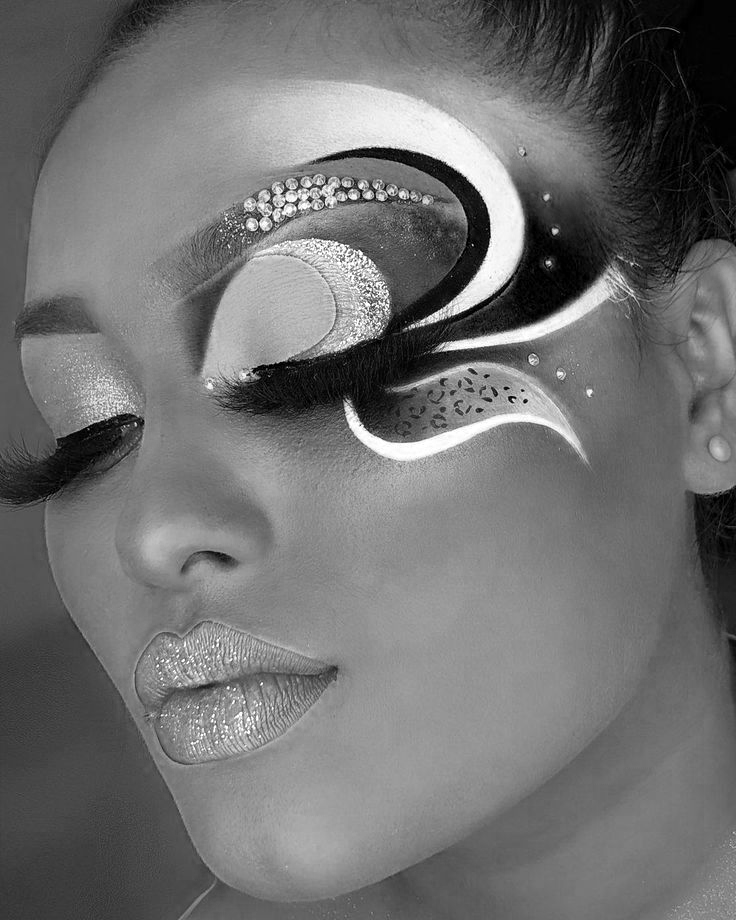

In [ ]:
# Canal Azul (B)
B = imagen_bgr[:,:,0]
print("Estadísticas del canal Azul:")
print(f"Valor mínimo: {B.min()}, Valor máximo: {B.max()}, Promedio: {B.mean():.2f}")
cv2_imshow(B)


Estadísticas del canal Verde:
Valor mínimo: 0, Valor máximo: 255, Promedio: 126.53


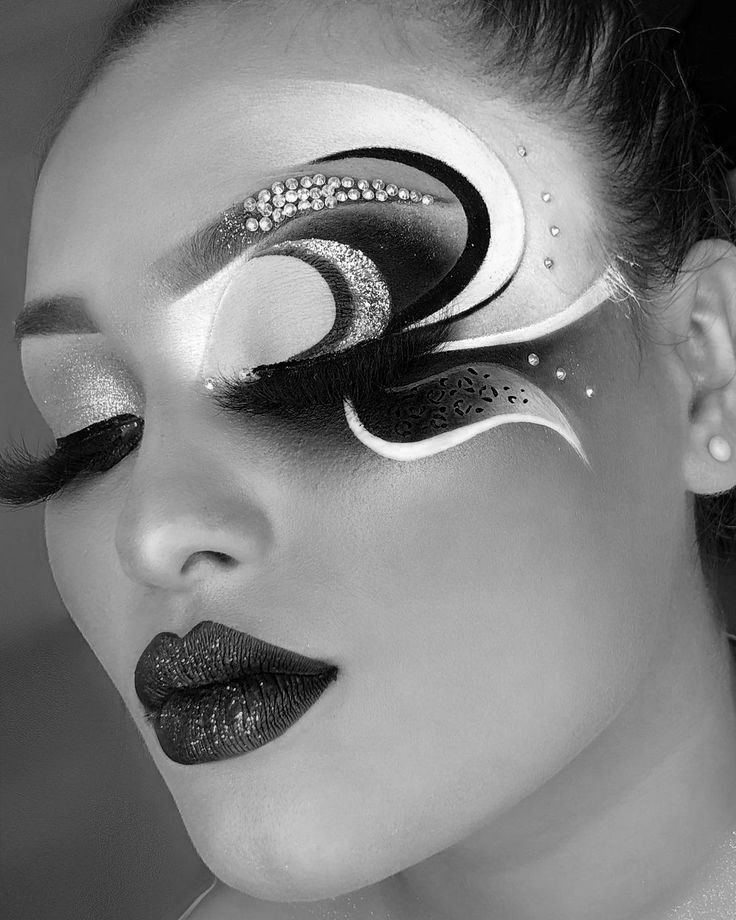

In [ ]:
# Canal Verde (G)
G = imagen_bgr[:,:,1]
print("\nEstadísticas del canal Verde:")
print(f"Valor mínimo: {G.min()}, Valor máximo: {G.max()}, Promedio: {G.mean():.2f}")
cv2_imshow(G)


Estadísticas del canal Rojo:
Valor mínimo: 0, Valor máximo: 255, Promedio: 174.09


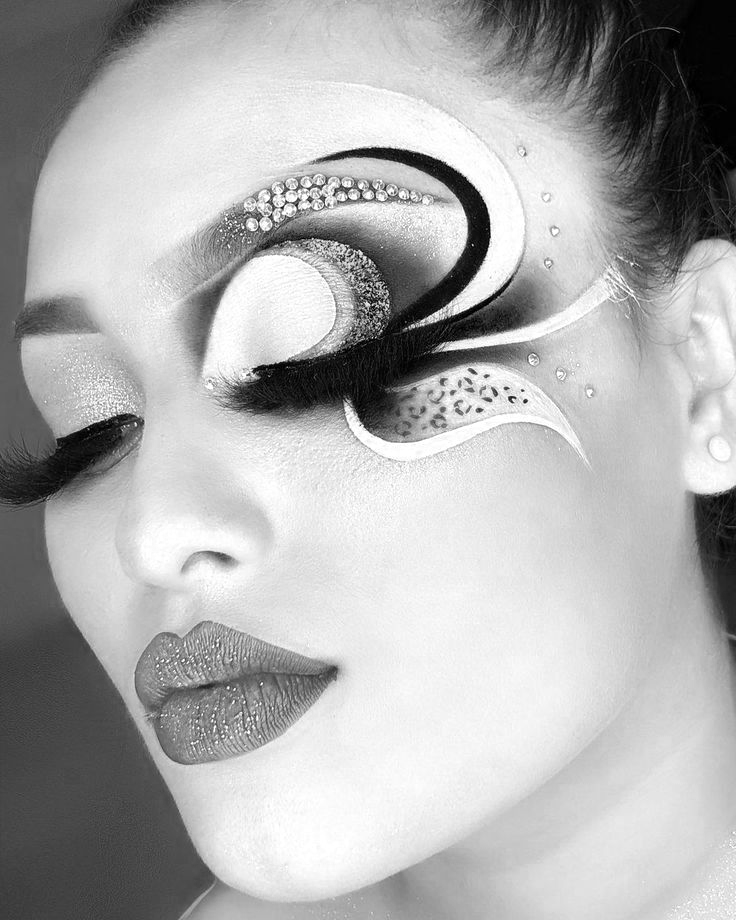

In [ ]:
# Canal Rojo (R)
R = imagen_bgr[:,:,2]
print("\nEstadísticas del canal Rojo:")
print(f"Valor mínimo: {R.min()}, Valor máximo: {R.max()}, Promedio: {R.mean():.2f}")
cv2_imshow(R)

# b) Identificar cuál de los tres canales tiene mayor información basándose en los valores promedio.

PARA PODER HACER EL PROMEDIO UTILIZAMOS LA FUNCION MEAN YA QUE HACE EL PROMEDIO DE TODOS LOS VALORES CORRESPONDIENTES A ESE CANAL QUE ESTAMOS TRABAJANDO (AZUL, VERDE O ROJO CORRESPONDIENTEMENTE)

In [ ]:
promazul = B.mean()
promverde = G.mean()
promrojo = R.mean()

print("Promedio de azul: " + str(promazul))
print("Promedio de verde: " + str(promverde))
print("Promedio de rojo: " + str(promrojo))

if promrojo > promverde and promrojo > promazul:
    print("El canal con mayor información es el rojo")
elif promverde > promazul:
    print("El canal con mayor información es el verde")
else:
    print("El canal con mayor información es el azul")


Promedio de azul: 112.22595699432893
Promedio de verde: 126.53086749763705
Promedio de rojo: 174.08534823960304
El canal con mayor información es el rojo


# c) Convertir la imagen de BGR a RGB y explicar por qué los colores se ven diferentes antes y después de la conversión.

In [ ]:
# Demostración de conversión BGR a RGB
imagen_bgr = cv2.imread('/content/foto1.jpg')
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)#conversion de bgr a rgb

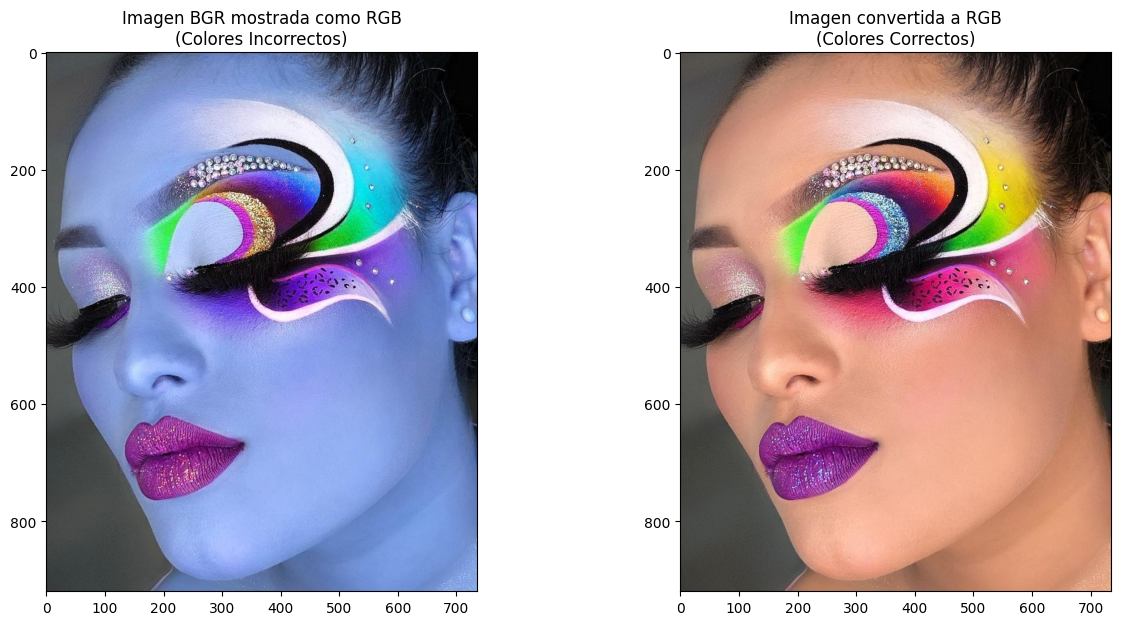

In [ ]:
# Visualización comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

ax1.imshow(imagen_bgr)
ax1.set_title('Imagen BGR mostrada como RGB\n(Colores Incorrectos)')

ax2.imshow(imagen_rgb)
ax2.set_title('Imagen convertida a RGB\n(Colores Correctos)')

plt.show()

**Los colores se ven diferentes antes y después de la conversión porque OpenCV carga las imágenes en formato BGR (azul, verde, rojo), mientras que la mayoría de los visores y librerías como Matplotlib utilizan el formato RGB (rojo, verde, azul); por eso, si mostramos una imagen en BGR sin convertirla a RGB, los canales de color están invertidos y los colores se ven alterados (por ejemplo, un rojo puede verse azul), y al aplicar la conversión con se corrige el orden de los canales, logrando una visualización correcta.**

#**Ejercicio 2: Muestreo y Cuantización**


a) Aplicar muestreo espacial a una imagen con factores de 2, 4 y 8.
b) Para cada caso, calcular:
El nuevo tamaño de la imagen
El porcentaje de reducción de datos
c) Aplicar cuantización con 4 niveles diferentes (32, 64, 128, 256)
d) ¿En qué nivel de cuantización comienza a ser visible la degradación de la imagen?**

# a) Aplicar muestreo espacial a una imagen con factores de 2, 4 y 8.

CAMBIE LA IMAGEN A UTILIZAR ASI QUE LA CARGO:

In [ ]:
!wget ""https://i.pinimg.com/736x/42/4c/ce/424cce1be94ca660bc7312e3e3f56e0a.jpg""


--2025-04-15 13:21:13--  https://i.pinimg.com/736x/42/4c/ce/424cce1be94ca660bc7312e3e3f56e0a.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.0.84, 151.101.64.84, 151.101.128.84, ...
Connecting to i.pinimg.com (i.pinimg.com)|151.101.0.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79593 (78K) [image/jpeg]
Saving to: ‘424cce1be94ca660bc7312e3e3f56e0a.jpg’

424cce1be94ca660bc7 100%[===================>]  77.73K  --.-KB/s    in 0.003s  

2025-04-15 13:21:13 (22.8 MB/s) - ‘424cce1be94ca660bc7312e3e3f56e0a.jpg’ saved [79593/79593]



LEEMOS LA IMAGEN EN ESCALA DE GRISES USANDO OPENCV
EN LUGAR DE LLERLA CON LOS 3 CANALES(BGR) LA CARGAMOS COMO UNA MATRIZ DE UNA SOLA CAPA (INTENSIDAD DE GRIS)Y MOSTRAMOS LA IMAGEN USANDO MATPLOTLIB, APLICANDO UN MAPA DE COLOR EN ESCALA DE GRISES LO QUE ASEGURA QUE LA IMAGEN SE VEA EN TONOS BLANCOS Y NEGROS COMO CORRESPONDE

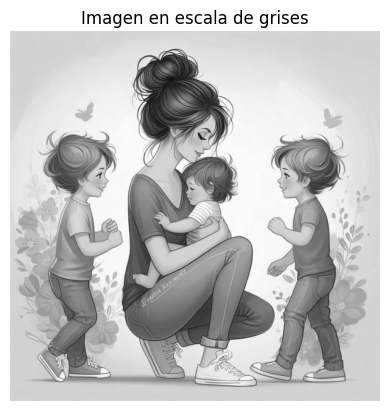

In [ ]:
imagen = cv2.imread("/content/foto2.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(imagen, cmap='gray')
plt.title("Imagen en escala de grises")
plt.axis("off")
plt.show()


In [ ]:
imagen_rgb.shape

(920, 736, 3)

a) **AplicaMOS muestreo espacial a una imagen con factores de 2, 4 y 8, ES DECIR REDUCIOMOS LA RESOLUCION DE LA IMAGEN ORIGINAL, SELECCIONANDO UNO DE CADA N PIXELES EN FILAS Y COLUMNAS. ESTO DISMINUYE EL TAMAÑO DE LA IMAGEN Y LA CANTIDAD DE DATOS , SIMULANDO UNA MENOR CALIDAD DE CAPTURA.** l

In [ ]:
d = 2   # Factor de muestreo: toma 1 pixel cada 'd' pixeles
(Nx,Mx) = X.shape          # Obtiene dimensiones de imagen original
ix = range(0,Nx,d)         # Crea secuencia de 0 a Nx saltando de d en d --FILAS--
jx = range(0,Mx,d)         # Igual para columnas
Ny = len(ix)               # Nueva altura = número de filas a tomar
My = len(jx)               # Nueva anchura = número de columnas a tomar

In [ ]:
# Crea nueva imagen muestreada
Y = np.zeros((Ny,My), np.uint8)  # Matriz vacía de enteros 0-255
for i in range(Ny):              # Para cada fila
    for j in range(My):          # Para cada columna
        Y[i,j] = X[ix[i],jx[j]]  # Copia el pixel correspondiente

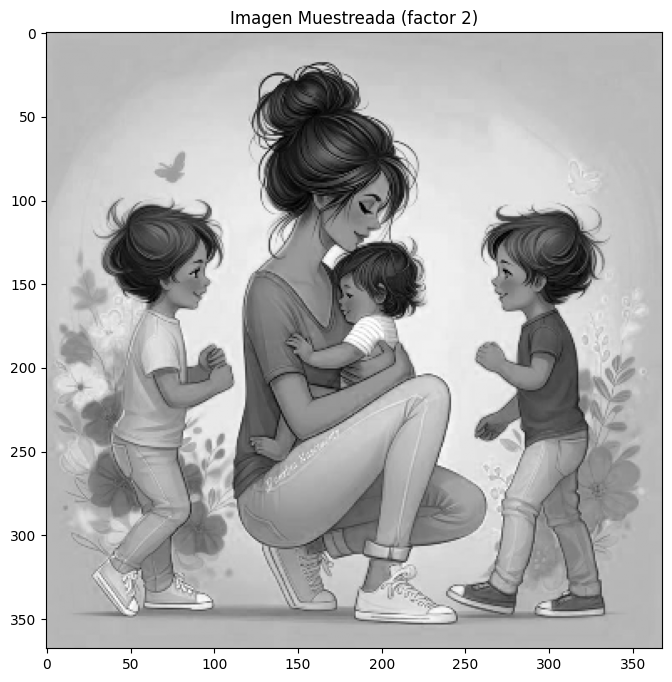

Tamaño = (368, 368)
Máximo = 255
Mínimo = 0
Resolución reducida de 736x736 a 368x368 pixels


In [ ]:
# Muestra imagen muestreada
plt.figure(figsize=(8,8))
plt.imshow(Y, cmap='gray')
plt.title(f'Imagen Muestreada (factor {d})')
plt.show()
howis(Y)
print(f'Resolución reducida de {Nx}x{Mx} a {Ny}x{My} pixels')

In [ ]:
d = 4   # Factor de muestreo: toma 1 pixel cada 'd' pixeles
(Nx,Mx) = X.shape          # Obtiene dimensiones de imagen original
ix = range(0,Nx,d)         # Crea secuencia de 0 a Nx saltando de d en d --FILAS--
jx = range(0,Mx,d)         # Igual para columnas
Ny = len(ix)               # Nueva altura = número de filas a tomar
My = len(jx)               # Nueva anchura = número de columnas a tomar

In [ ]:
# Crea nueva imagen muestreada
Y = np.zeros((Ny,My), np.uint8)  # Matriz vacía de enteros 0-255
for i in range(Ny):              # Para cada fila
    for j in range(My):          # Para cada columna
        Y[i,j] = X[ix[i],jx[j]]  # Copia el pixel correspondiente

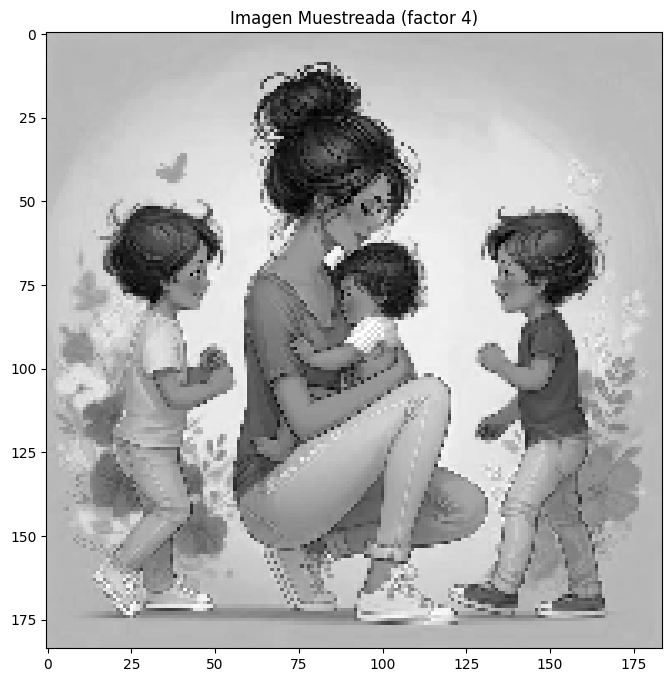

Tamaño = (184, 184)
Máximo = 255
Mínimo = 0
Resolución reducida de 736x736 a 184x184 pixels


In [ ]:
# Muestra imagen muestreada
plt.figure(figsize=(8,8))
plt.imshow(Y, cmap='gray')
plt.title(f'Imagen Muestreada (factor {d})')
plt.show()
howis(Y)
print(f'Resolución reducida de {Nx}x{Mx} a {Ny}x{My} pixels')

In [ ]:
d = 8   # Factor de muestreo: toma 1 pixel cada 'd' pixeles
(Nx,Mx) = X.shape          # Obtiene dimensiones de imagen original
ix = range(0,Nx,d)         # Crea secuencia de 0 a Nx saltando de d en d --FILAS--
jx = range(0,Mx,d)         # Igual para columnas
Ny = len(ix)               # Nueva altura = número de filas a tomar
My = len(jx)               # Nueva anchura = número de columnas a tomar

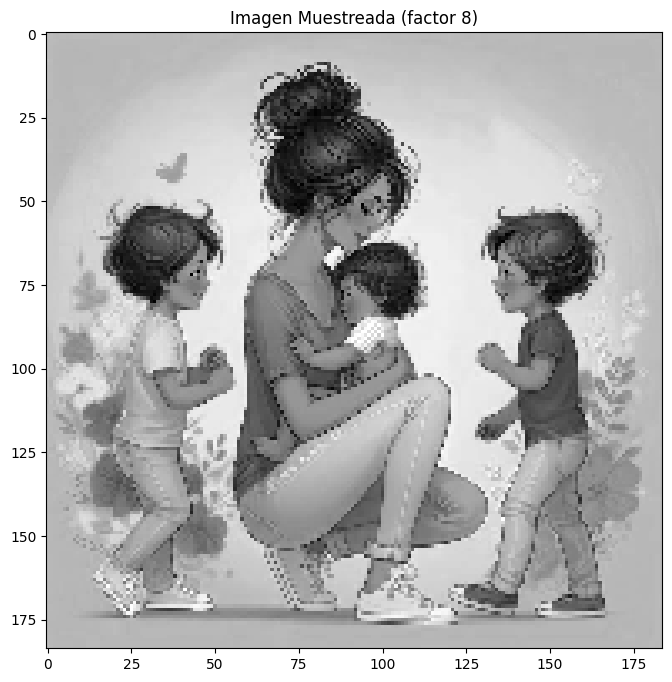

Tamaño = (184, 184)
Máximo = 255
Mínimo = 0
Resolución reducida de 736x736 a 92x92 pixels


In [ ]:
# Muestra imagen muestreada
plt.figure(figsize=(8,8))
plt.imshow(Y, cmap='gray')
plt.title(f'Imagen Muestreada (factor {d})')
plt.show()
howis(Y)
print(f'Resolución reducida de {Nx}x{Mx} a {Ny}x{My} pixels')

**b) Para cada caso, calcular: El nuevo tamaño de la imagen El porcentaje de reducción de datos **

# b.1) Para cada caso, calcular: El nuevo tamaño de la imagen

In [ ]:
for d in [2, 4, 8]:
    (Nx, Mx) = X.shape
    ix = range(0, Nx, d)
    jx = range(0, Mx, d)
    Ny = len(ix)
    My = len(jx)
    print(f"Factor {d}: nuevo tamaño = {Ny} x {My}")


Factor 2: nuevo tamaño = 368 x 368
Factor 4: nuevo tamaño = 184 x 184
Factor 8: nuevo tamaño = 92 x 92


# b.2) Para cada caso, calcular: El porcentaje de reducción de datos

In [ ]:
#Porcentaje de reduccion de imagen factor 2
reduccion = 100 * (1 - (256*256)/(512*512))
print(f"Reducción de datos: {reduccion:.2f}%")


Reducción de datos: 75.00%


In [ ]:
#Porcentaje de reduccion de imagen factor 4
reduccion = 100 * (1 - (128*128)/(512*512))
print(f"Reducción de datos: {reduccion:.2f}%")

Reducción de datos: 93.75%


In [ ]:
#Porcentaje de reduccion de imagen factor 8
reduccion = 100 * (1 - (64*64)/(512*512))
print(f"Reducción de datos: {reduccion:.2f}%")

Reducción de datos: 98.44%


# c) Aplicar cuantización con 4 niveles diferentes (32, 64, 128, 256)

In [1]:
# Leer imagen original
url = "https://i.pinimg.com/736x/42/4c/ce/424cce1be94ca660bc7312e3e3f56e0a.jpg"
resp = urllib.request.urlopen(url)
imagen_bytes = np.asarray(bytearray(resp.read()), dtype="uint8")
imagen_bgr = cv2.imdecode(imagen_bytes, cv2.IMREAD_COLOR)

# Convertimos a RGB para que se vea correctamente con matplotlib
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

# Definimos los niveles de cuantización que queremos probar
niveles = [32, 64, 128, 256]

# Preparamos una figura para mostrar las 4 imágenes cuantizadas
plt.figure(figsize=(10, 8))

# Iteramos sobre cada nivel de cuantización
for i, q in enumerate(niveles):

    if q == 256:
        imagen_cuantizada = imagen_rgb.copy()  # No se modifica, ya está en su máxima calidad
    else:
        imagen_cuantizada = np.floor(imagen_rgb / q) * q

    imagen_cuantizada = imagen_cuantizada.astype(np.uint8)

    # Mostramos la imagen
    plt.subplot(2, 2, i+1)
    plt.imshow(imagen_cuantizada)
    plt.title(f'Cuantización con nivel {q}')
    plt.axis('off')

plt.tight_layout()
plt.show()


NameError: name 'urllib' is not defined

# **¿En qué nivel de cuantización comienza a ser visible la degradación de la imagen?**

**Comienza a ser visible en el nivel 32**

Consignas ejercicios 3 : Dada una imagen con objetos de diferentes colores:

a) Implementar una segmentación para extraer objetos de un color específico usando umbrales en los canales RGB.
b) Calcular y mostrar el histograma de la imagen en escala de grises.
c) Encontrar las coordenadas del rectángulo que encierra el objeto segmentado.
d) Dibujar los bordes del objeto segmentado en color rojo.**
**

# **a) Implementar una segmentación para extraer objetos de un color específico usando umbrales en los canales RGB. **

# **Ejercicio 3: Segmentación por Color**

In [ ]:
# Bibliotecas necesarias
import numpy as np
from cv2 import imread
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
# Función para analizar características de la imagen
def info_img(img):
    print('tamaño =', img.shape)
    print('máximo =', np.max(img))
    print('mínimo =', np.min(img))

In [ ]:
!wget ""https://i.pinimg.com/474x/eb/cd/94/ebcd94e64706885a920956f32aeccce9.jpg""

--2025-04-15 18:40:10--  https://i.pinimg.com/474x/eb/cd/94/ebcd94e64706885a920956f32aeccce9.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.54.127.72, 23.54.127.78, 2a04:4e42::84, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.54.127.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84386 (82K) [image/jpeg]
Saving to: ‘ebcd94e64706885a920956f32aeccce9.jpg.5’

ebcd94e64706885a920 100%[===================>]  82.41K  --.-KB/s    in 0.003s  

2025-04-15 18:40:10 (24.6 MB/s) - ‘ebcd94e64706885a920956f32aeccce9.jpg.5’ saved [84386/84386]



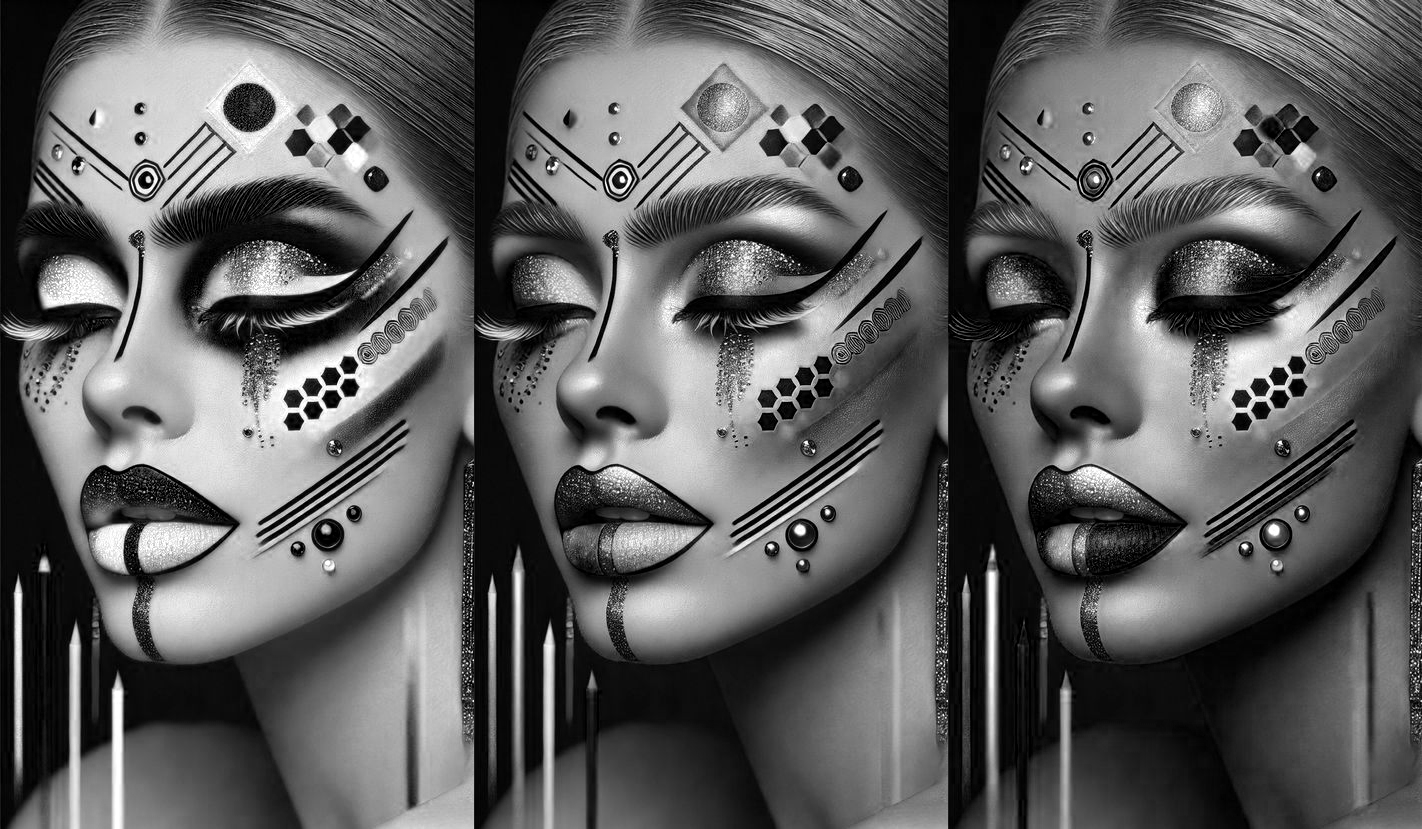

In [ ]:
# Separación de canales de color
rojo = img[:,:,0]
verde = img[:,:,1]
azul = img[:,:,2]
canales = np.concatenate((rojo,verde,azul),axis=1)
cv2_imshow(canales)

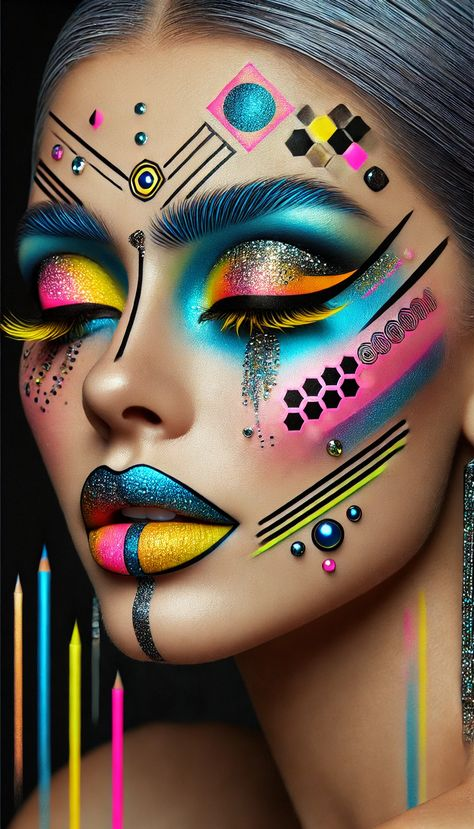

tamaño = (829, 474, 3)
máximo = 255
mínimo = 0


In [ ]:
img_cv = imread('/content/ebcd94e64706885a920956f32aeccce9.jpg.3')      # formato opencv (BGR)
cv2_imshow(img_cv)
info_img(img_cv)

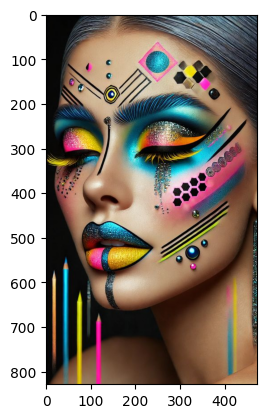

In [ ]:
# Conversión BGR a RGB
img = img_cv[:,:,[2,1,0]]          # BGR a RGB
plt.imshow(img)
plt.show()

LO QUE SEGMETARE EN LA IMAGEN SON TODOS LAS ZONAS DE COLOR AMARILLO

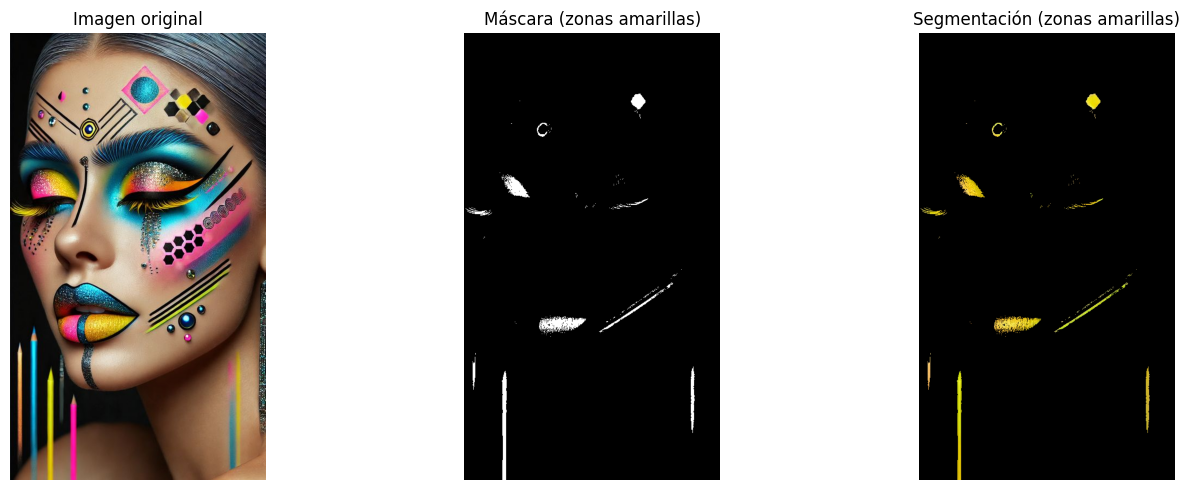

In [ ]:
# Definimos umbrales en los canales RGB para segmentar amarillo brillante
lower = np.array([180, 170, 0])   # Umbral inferior: R, G, B
upper = np.array([255, 255, 120]) # Umbral superior: R, G, B

# Crear máscara (True donde el color está en el rango)
mask = np.all((img >= lower) & (img <= upper), axis=-1)

# Crear una nueva imagen donde se conserven solo los píxeles segmentados
segmented_img = np.zeros_like(img)            # Imagen negra del mismo tamaño
segmented_img[mask] = img[mask]               # Copiar solo los píxeles que coinciden

# Mostrar resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Imagen original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title("Máscara (zonas amarillas)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(segmented_img)
plt.title("Segmentación (zonas amarillas)")
plt.axis('off')

plt.tight_layout()
plt.show()


# **b) Calcular y mostrar el histograma de la imagen en escala de grises.**

### **El histograma de una imagen es una representación gráfica que muestra la distribución de los niveles de intensidad de los píxeles.**
**En el caso de imágenes en color (RGB), se puede calcular un histograma para cada canal (Rojo, Verde y Azul) por separado. Esto permite analizar cómo se distribuyen los colores en la imagen y es útil para tareas como la mejora de contraste, la segmentación o la detección de objetos por color.**


tamaño = (829, 474)
máximo = 255
mínimo = 0


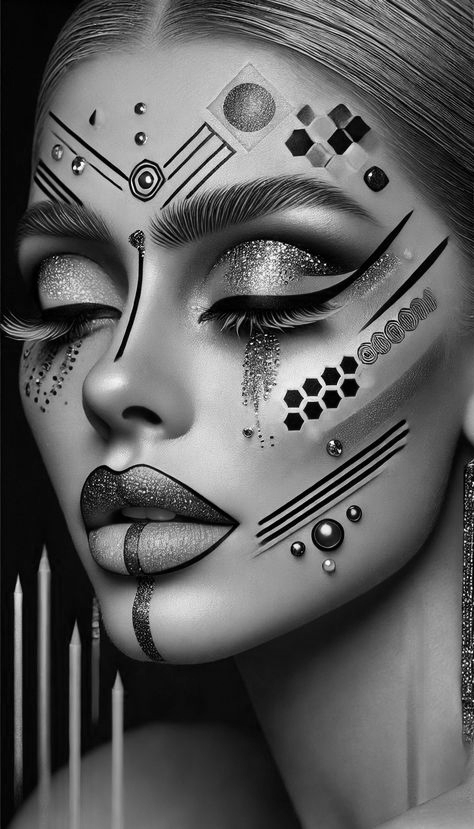

In [ ]:
# Conversión a escala de grises
rojo_f = rojo.astype(float)
verde_f = verde.astype(float)
azul_f = azul.astype(float)
# Promedio ponderado
peso = (1/3,1/3,1/3)
#peso = (0.1,0.4,0.5)  # pesos alternativos
gris_f = peso[0]*rojo_f + peso[1]*verde_f + peso[2]*azul_f
gris = gris_f.astype(int)
info_img(gris)
cv2_imshow(gris)

In [ ]:
# Función para mostrar histograma
def histograma(X):
    (N,M) = X.shape
    n = 256
    h = np.zeros((256,))
    for i in range(N):
        for j in range(M):
            x = X[i,j]
            h[x] = h[x]+1
    plt.plot(range(n),h[0:n])
    plt.title('Histograma')
    plt.xlabel('Valor de pixel')
    plt.ylabel('Frecuencia')
    plt.show()

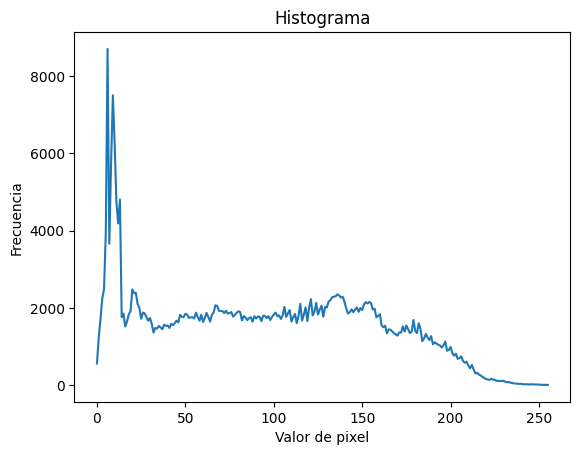

In [ ]:
histograma(gris)

QUE ME MUESTRA ESTE HISTOGRAMA?

El histograma muestra la distribución de los niveles de gris en la imagen segmentada o convertida. Se observa un pico muy marcado en los valores bajos (cercanos a 0), lo que indica la presencia de muchas zonas oscuras o negras.

También se identifican valores medios (10O/150) con frecuencia, lo que podria denotar la existencia de detalles de tonalidades intermedias.

En cambio, los valores altos (blancos o muy claros) son menos frecuentes. Esto confirma que la imagen contiene mayoritariamente tonos oscuros y medios, lo cual es consistente con el tipo de segmentación y el contenido original de la imagen.


# **c) Encontrar las coordenadas del rectángulo que encierra el objeto segmentado. **

In [ ]:
# Búsqueda de coordenadas del rectángulo
i_min = 100
i_max = 170
j_min = 100
j_max = 180
for i in range(N):
    for j in range(M):
        if limpia[i,j]>0:
            if i<i_min: i_min = i
            if i>i_max: i_max = i
            if j<j_min: j_min = j
            if j>j_max: j_max = j

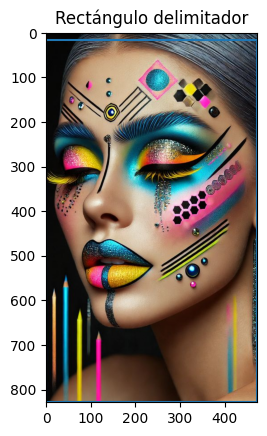

In [ ]:
# Dibujo del rectángulo
y = [i_min,i_min,i_max,i_max,i_min]
x = [j_min,j_max,j_max,j_min,j_min]
plt.imshow(img)
plt.plot(x,y)
plt.title('Rectángulo delimitador')
plt.show()

# **d) Dibujar los bordes del objeto segmentado en color rojo.**

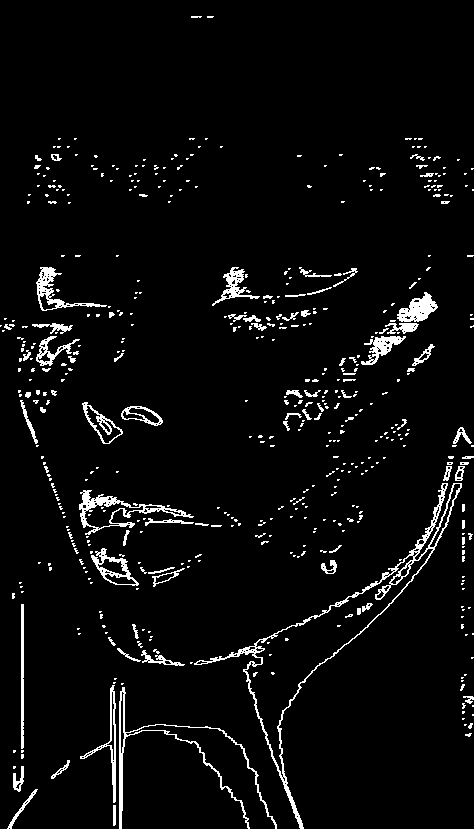

In [ ]:
# Detección de bordes
borde = np.zeros((N,M),np.uint8)
# Bordes horizontales
for i in range(N):
    for j in range(1,M):
        if limpia[i,j]!=limpia[i,j-1]:
            borde[i,j] = 1
            borde[i,j-1] = 1
# Bordes verticales
for i in range(1,N):
    for j in range(M):
        if limpia[i-1,j]!=limpia[i,j]:
            borde[i,j] = 1
            borde[i,j-1] = 1
cv2_imshow(borde*255)

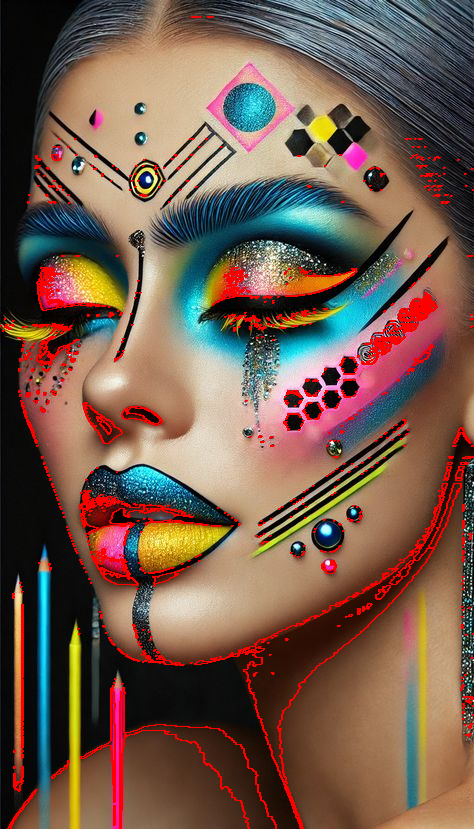

In [ ]:
# Resultado final con bordes en ROJO
img_final = img_cv.copy()
for i in range(N):
    for j in range(M):
        if borde[i,j]==1:
            img_final[i,j,:] = [0,0,255]
cv2_imshow(img_final)